In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim

In [4]:
dataset=pd.read_csv('/content/drive/MyDrive/gold.csv')

In [5]:
dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-06-13,6346.0,6350.0,6295.0,6323.0,6323.0,17820
1,2022-06-14,6133.0,6175.0,6120.0,6165.0,6165.0,12430
2,2022-06-15,6133.0,6157.0,6118.0,6135.0,6135.0,5470
3,2022-06-16,6169.0,6181.0,6159.0,6159.0,6159.0,2630
4,2022-06-17,6152.0,6215.0,6131.0,6212.0,6212.0,15660
...,...,...,...,...,...,...,...
240,2023-06-05,6778.0,6780.0,6750.0,6761.0,6761.0,56380
241,2023-06-06,6776.0,6794.0,6774.0,6781.0,6781.0,5470
242,2023-06-07,6795.0,6800.0,6781.0,6790.0,6790.0,4500
243,2023-06-08,6746.0,6765.0,6746.0,6759.0,6759.0,21250


In [6]:
dataset.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       245 non-null    object 
 1   Open       245 non-null    float64
 2   High       245 non-null    float64
 3   Low        245 non-null    float64
 4   Close      245 non-null    float64
 5   Adj Close  245 non-null    float64
 6   Volume     245 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.5+ KB


In [8]:
dataset['Date']=pd.to_datetime(dataset['Date'])

In [9]:
dataset['Open']=dataset['Open'].astype('int32')
dataset['High']=dataset['High'].astype('int32')
dataset['Low']=dataset['Low'].astype('int32')
dataset['Close']=dataset['Close'].astype('int32')
dataset['Adj Close']=dataset['Adj Close'].astype('int32')

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       245 non-null    datetime64[ns]
 1   Open       245 non-null    int32         
 2   High       245 non-null    int32         
 3   Low        245 non-null    int32         
 4   Close      245 non-null    int32         
 5   Adj Close  245 non-null    int32         
 6   Volume     245 non-null    int64         
dtypes: datetime64[ns](1), int32(5), int64(1)
memory usage: 8.7 KB


In [11]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [12]:
min=MinMaxScaler()
lab=LabelEncoder()

In [13]:
num_cols=dataset.select_dtypes(include=np.number).columns

In [14]:
for col in num_cols:
  dataset[col]=min.fit_transform(dataset[[col]])

In [15]:
dataset['Date']=lab.fit_transform(dataset['Date'])

In [16]:
dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,0,0.498498,0.499500,0.482249,0.504407,0.504407,0.165070
1,1,0.285285,0.324675,0.309665,0.349657,0.349657,0.113432
2,2,0.285285,0.306693,0.307692,0.320274,0.320274,0.046752
3,3,0.321321,0.330669,0.348126,0.343781,0.343781,0.019544
4,4,0.304304,0.364635,0.320513,0.395690,0.395690,0.144376
...,...,...,...,...,...,...,...
240,240,0.930931,0.929071,0.930966,0.933399,0.933399,0.534489
241,241,0.928929,0.943057,0.954635,0.952987,0.952987,0.046752
242,242,0.947948,0.949051,0.961538,0.961802,0.961802,0.037459
243,243,0.898899,0.914086,0.927022,0.931440,0.931440,0.197931


In [17]:
x=dataset.drop('Adj Close',axis=1)
y=dataset['Adj Close']

In [18]:
x=torch.tensor(x.values,dtype=torch.float32)
y=torch.tensor(y.values,dtype=torch.float32)

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [21]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

(torch.Size([196, 6]),
 torch.Size([49, 6]),
 torch.Size([196]),
 torch.Size([49]))

In [22]:
# Reshape x_train for LSTM input
x_train = x_train.reshape(x_train.shape[0], 1, x_train.shape[1])
x_test = x_test.reshape(x_test.shape[0], 1, x_test.shape[1])

In [23]:
class timeseriesforecast(nn.Module):
  def __init__(self,input_size,hidden_size,output_size):
    super(timeseriesforecast,self).__init__()
    self.input=nn.LSTM(input_size,hidden_size)
    self.hidden=nn.Linear(hidden_size,output_size)

  def forward(self,x):
    out,hidden=self.input(x)
    out=self.hidden(out[:,-1,:])
    return out

In [24]:
#providing parameter for the sizes
input_size=6
hidden_size=10
output_size=1



In [25]:
model=timeseriesforecast(input_size,hidden_size,output_size)

In [26]:
#Loss and optimizer parameter
loss = nn.MSELoss()
optimizer=optim.Adam(model.parameters(),lr=0.001)

In [27]:
num_epochs=1000
for epochs in range(num_epochs):
  y_pred=model(x_train)
  l=loss(y_pred,y_train.unsqueeze(1))
  l.backward()
  optimizer.step()
  optimizer.zero_grad()
  if (epochs+1)%10:
    print(f'epoch:{epochs+1},loss={l.item():.4f}')

epoch:1,loss=0.3634
epoch:2,loss=0.3564
epoch:3,loss=0.3493
epoch:4,loss=0.3422
epoch:5,loss=0.3350
epoch:6,loss=0.3278
epoch:7,loss=0.3206
epoch:8,loss=0.3134
epoch:9,loss=0.3061
epoch:11,loss=0.2916
epoch:12,loss=0.2843
epoch:13,loss=0.2771
epoch:14,loss=0.2700
epoch:15,loss=0.2629
epoch:16,loss=0.2560
epoch:17,loss=0.2491
epoch:18,loss=0.2424
epoch:19,loss=0.2358
epoch:21,loss=0.2233
epoch:22,loss=0.2173
epoch:23,loss=0.2115
epoch:24,loss=0.2059
epoch:25,loss=0.2006
epoch:26,loss=0.1955
epoch:27,loss=0.1906
epoch:28,loss=0.1859
epoch:29,loss=0.1815
epoch:31,loss=0.1733
epoch:32,loss=0.1696
epoch:33,loss=0.1660
epoch:34,loss=0.1626
epoch:35,loss=0.1594
epoch:36,loss=0.1564
epoch:37,loss=0.1535
epoch:38,loss=0.1508
epoch:39,loss=0.1482
epoch:41,loss=0.1433
epoch:42,loss=0.1410
epoch:43,loss=0.1388
epoch:44,loss=0.1367
epoch:45,loss=0.1346
epoch:46,loss=0.1325
epoch:47,loss=0.1304
epoch:48,loss=0.1283
epoch:49,loss=0.1261
epoch:51,loss=0.1212
epoch:52,loss=0.1184
epoch:53,loss=0.1152
e

In [28]:
# Make predictions on the test set
with torch.no_grad():
    y_predicted = model(x_test)

# Inverse transform the predictions and actual values
# This is crucial to get the predictions back to the original scale

y_predicted = y_predicted.numpy().flatten()
y_test_np = y_test.numpy()


#Reshape to fit inverse_transform
y_predicted = y_predicted.reshape(-1,1)
y_test_np = y_test_np.reshape(-1,1)

y_predicted = min.inverse_transform(y_predicted)
y_test_np = min.inverse_transform(y_test_np)

# Evaluate the model using Mean Squared Error (MSE)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test_np, y_predicted)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 24015242.0


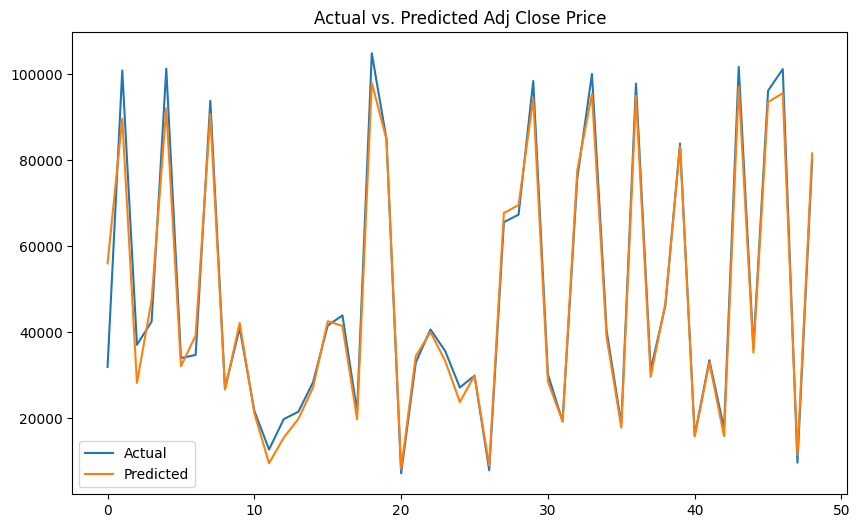

In [29]:
# Plot predictions vs. actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test_np, label='Actual')
plt.plot(y_predicted, label='Predicted')
plt.legend()
plt.title('Actual vs. Predicted Adj Close Price')
plt.show()